## Exercise: Connected components and running time

<font color='blue'><b>Goal:</b></font>
Implement basic graph algorithms (BFS, finding the connected component of a vertex, counting connected components of a graph) and measure execution times in Python.

---

### Implementing the breadth-first-search algorithm (BFS)

In class, you've seen the BFS algorithm for computing distances from a fixed vertex $v_1\in V$ in a graph $G=(V,E)$.

<font color='blue'><b>Your first task:</b></font> Implement the BFS algorithm, following the pseudocode given in Algorithm 2 in the script. The following might be helpful:
- Define a node attribute to store the distances to the starting vertex $v_1$.
- To represent $\infty$, which you need in the initialization phase, import the `math` module and use `math.inf`.
- Return a dictionary that has the nodes of $G$ as keys, and the distances to $v_1$ as values.

In [3]:
import math

def bfs(G, v1):
    nx.set_node_attributes(G, math.inf, "distance")
    G.nodes[v1]['distance'] = 0
    L = [v1]
    current_distance = 1

    # main loop
    while [] != L:
        L_new = []
        for w in L:
            for v in G.neighbors(w):
                if math.inf == G.nodes[v]['distance']:
                    G.nodes[v]['distance'] = current_distance
                    L_new.append(v)
        current_distance += 1
        L = L_new

    # return
    return dict([(v, G.nodes[v]['distance']) for v in G.nodes])

For a quick sanity check of your implementation, run the example below and compare the calculated distances to the ones that you can infer from the picture.
Note that the example generates graphs using the function `gnp_random_graph(n,p)` from `networkx`, which takes two arguments $n$ and $p$, and then returns an Erdös-Renyi random graph on $n$ vertices, where every one of the potential $\binom n 2$ edges appears with probability $p$. Thus, repeatedly running the subsequent code cell, you'll always get different graphs to check your implementation on.

{0: 0, 1: 1, 2: 3, 3: 2, 4: 2, 5: 3, 6: 2}


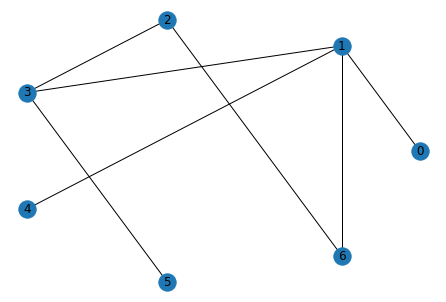

In [5]:
import networkx as nx
%matplotlib inline

# random graph G
G = nx.gnp_random_graph(7, 0.4)

# draw G
node_pos =  nx.circular_layout(G)
nx.draw(G, with_labels = True, pos = node_pos)

# calculate and print distances from vertex 0
dist = bfs(G,0)
print(dist)

---

### Measuring execution time

You've seen in class that BFS has a running time that is at most linear in the input size, i.e., if the input graph is $G=(V,E)$, then the running time is in $O(|V|+|E|)$ (see Theorem 3.14). We now want to check if we can reproduce this running time behaviour in practice by measuring execution times of your implementation of the BFS algorithm.

To this end, we use the module `time`, which provides a function `time()` to measure execution times. Study the code below to see how it is used. Note that once again, we generate random graphs for the testing purposes. As we want to compare execution times to $|V|+|E|$, we also store this quantity in every iteration.

In [8]:
import math
import time
import networkx as nx

# number of vertices for the random graphs
nn = [math.floor(math.pow(10,0.5*i)) for i in range(2,8)]
sizes = [] # list for storing graph sizes |V|+|E|
times = [] # list for storing measured execution times

for n in nn:
    # generate random graph
    G = nx.gnp_random_graph(n, 0.4)
    # store size
    sizes = sizes + [G.number_of_nodes() + G.number_of_edges()]
    # measure execution time of bfs()
    start_time = time.time()
    bfs(G, 0)
    end_time = time.time()
    # store time
    times = times + [end_time - start_time]

Let's plot the measured execution times. Go through the subsequent code block and run it to obtain the plot. Note that we use logarithmic axes for the plot, which is particularly suitable for an analysis of execution times as we do it here.

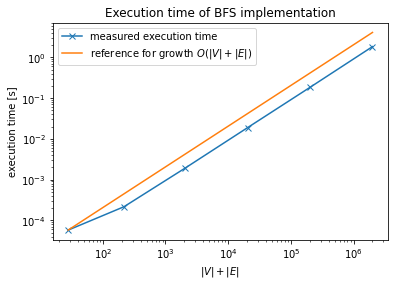

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot measured data
plt.plot(sizes, times, 'x-', 
         label = 'measured execution time')
# plot reference for linear growth
#   (scaled to be aligned with data at first measurment)
plt.plot(sizes, [s*times[0]/sizes[0] for s in sizes], '-', 
         label = 'reference for growth $O(|V|+|E|)$')
# logarithmic scale for axes
plt.xscale('log')
plt.yscale('log')
# title, axis labels, legend placement
plt.title('Execution time of BFS implementation')
plt.xlabel('$|V|+|E|$')
plt.ylabel('execution time [s]')
plt.legend(loc = 'best')
# display plot
plt.show()

<font color='blue'><b>Your second task:</b></font> Explain what the plot shows. Does it support the hypothesis that the measured execution times depend linearly on the size of the underlying graph? Why/why not? (This is not a coding exercise.)

Yes, the measured execution time is always less than the reference but both lines are almost parallel.


---

### Counting connected components

We'd like to use the BFS implementation from above to count the number of connected components of a graph. To start with, let's implement a function that finds the connected component of a given vertex.

<font color='blue'><b>Your third task:</b></font> Complete the following function `find_cc(G, s)` such that it returns a list of precisely those vertices that are in the same connected component of the input graph $G$ as the input vertex $s$. You can call the BFS implementation that you implemented earlier!

In [17]:
import networkx as nx

def find_cc(G, s):
    
    ### your implementation goes here
    bfsResult = bfs(G,s)
    connected_to_s = [k for k in bfsResult if math.inf != bfsResult[k] ]
    
    return list(connected_to_s)

For quick sanity checks, you can once again look at small randomly generated graphs:

[0, 2]


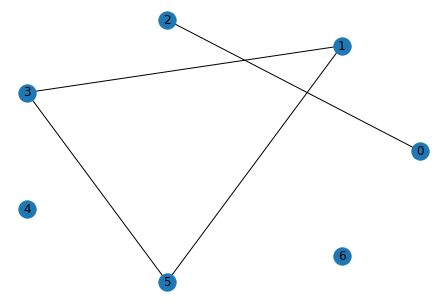

In [19]:
import networkx as nx
%matplotlib inline

# random graph G
G = nx.gnp_random_graph(7, 0.25)

# draw G
node_pos =  nx.circular_layout(G)
nx.draw(G, with_labels = True, pos = node_pos)

# calculate and print the component of vertex 0
comp = find_cc(G,0)
print(comp)

---

Now we can use the function `find_cc` to count how many connected components there are. Go through the following code, which accomplishes this task.

In [20]:
# A function for counting the number of connected components
def count_cc(G):
    
    num_cc = 0             # counter for the number of connected components
    vertices_found = []    # stores the vertices in connected components that were explored already
    vertices = nx.nodes(G) # shorthand for nx.nodes(G)
    
    for v in vertices:     # loop through vertices
        # if the component of v was not explored previously, do so now
        if v not in vertices_found: 
            new_vertices = find_cc(G,v)
            vertices_found = vertices_found + new_vertices
            num_cc += 1 
    
    return num_cc

Again, small random graphs can be used for sanity checks:

4


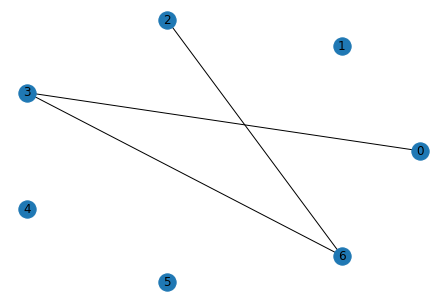

In [25]:
import networkx as nx
%matplotlib inline

# random graph G
G = nx.gnp_random_graph(7, 0.25)

# draw G
vx_pos =  nx.circular_layout(G)
nx.draw(G, with_labels = True, pos = vx_pos)

# count components and print result
comp = count_cc(G)
print(comp)

<font color='blue'><b>Your fourth task:</b></font>

- Analyze the running time of a call to the function `count_cc` and provide a bound in terms of the number of vertices and edges of the input graph (this is not a programming exercise).
- Measure execution times of the `count_cc` function applied to Erdös-Renyi random graphs on $n$ vertices with edge probability $p=\frac{\log n}{10 n}$ (we choose this probability decreasing in $n$ to have good chances that the resulting random graph does not consist of a single component only). Plot these measured execution times compared to the input size $|V|+|E|$ of the graph. You can use the same $n$ as we used above when plotting execution times of `bfs`.
- Check if your theoretical analysis and the measurments are aligned, and comment on your findings.

`Write the answer to the first subtask here.`

In [ ]:
# Write code to measure execution times of 'count_cc' here.


In [ ]:
# Write code to plot the measured times here.


`Comment on your findings here.`

---

In the previous exercise, you probably observed that the execution times of `count_cc` grow quadratically in $|V|+|E|$, i.e., they achieve the upper bound obtained from a running time analysis. If you have a closer look at the implementation, you can observe that this is on the one hand due to the initialization step that is performed in each call to the BFS subroutine, and on the other due to the repeated checks of whether a vertex is already in the list of vertices that we found alredy.

<font color='blue'><b>Your fifth task:</b></font> Can you come up with a more efficient implementation of the component counting procedure to match the claimed bound $O(|V|+|E|)$ in Exercise 3.18 of the script? As above, test your implementation on suitable random graphs and provide a plot comparing execution times of your algorithm and the function `count_cc` obtained earlier.

In [ ]:
# Implement an improved version of `count_cc` here, 
#   test it and compare it to `count_cc`.
